Using customer energy consumption data, the project aims to group consumers by similarity in order to understand customer behavior and its relationship with energy consumption.

In [55]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Loading the data
print("You can find the dataset used in this project here -> https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption")
dataset = pd.read_csv('dados/household_power_consumption.txt', delimiter = ';', low_memory = False)
print("----------------------------------------")
print("\nDataset's shape is: %s rows e %s columns\n" %dataset.shape)
print("----------------------------------------")
print("\nDataset's first 5 lines")
dataset.head(5)


You can find the dataset used in this project here -> https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption
----------------------------------------

Dataset's shape is: 2075259 rows e 9 columns

----------------------------------------

Dataset's first 5 lines


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [56]:
print("Dataset's datatypes:\n")
print(dataset.dtypes)
print("----------------------------------------")
# Checking if there are null values
print("Are there any null values?-> %s" %dataset.isnull().values.any())
print("----------------------------------------")
print("\nThe null numbers are as follows:\n ")
print(dataset.isnull().sum())

----------------------------------------
Dataset's datatypes:

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object
----------------------------------------
Are there any null values?-> True
----------------------------------------

The null numbers are as follows:
 
Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64


In [57]:
print("----------------------------------------")
# Removes the nulls and also remove the first two columns once that they aren't needed
dataset = dataset.iloc[0:, 2:9].dropna()

# Checking if there are still null values in the dataset
print("Does the dataset still have null values? -> %s" %dataset.isnull().values.any())
print("----------------------------------------")

----------------------------------------
Does the dataset still have null values? -> False
----------------------------------------


In [58]:

# Extracting the values of the attributes  
dataset_atrib = dataset.values
print("Below are the values taken from our Database\n")
print(dataset_atrib)
print("----------------------------------------")
# Taking 2.5% of our dataset, once that if we take all of it we woulnd't have the RAM needed
amostra1, amostra2 = train_test_split(dataset_atrib, train_size = .025)
print(f"\nThe new shape, after taking 2.7% as our sample is {amostra1.shape}")

Below are the values taken from our Database

[['4.216' '0.418' '234.840' ... '0.000' '1.000' 17.0]
 ['5.360' '0.436' '233.630' ... '0.000' '1.000' 16.0]
 ['5.374' '0.498' '233.290' ... '0.000' '2.000' 17.0]
 ...
 ['0.938' '0.000' '239.820' ... '0.000' '0.000' 0.0]
 ['0.934' '0.000' '239.700' ... '0.000' '0.000' 0.0]
 ['0.932' '0.000' '239.550' ... '0.000' '0.000' 0.0]]
----------------------------------------

The new shape, after taking 2.7% as our sample is (51232, 7)


In [59]:
# Applies the dimensionality reduction
pca = PCA(n_components = 2).fit_transform(amostra1)

# Determining a range of K
k_range = range(1,12)

# Applying the K-Means model to each value of K
k_means_var = [KMeans(n_clusters = k).fit(pca) for k in k_range]

# Adjusting the cluster centroid for each model
centroids = [X.cluster_centers_ for X in k_means_var]

# Calculating the Euclidean distance from each data point to the centroid
k_euclid = [cdist(pca, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke, axis = 1) for ke in k_euclid]

# Sum of the squares of the distances within the cluster
soma_quadrados_intra_cluster = [sum(d**2) for d in dist]

# Total sum of squares
soma_total = sum(pdist(pca)**2)/pca.shape[0]

# Sum of squares between clusters
soma_quadrados_inter_cluster = soma_total - soma_quadrados_intra_cluster

# Elbow's curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, soma_quadrados_inter_cluster/soma_total * 100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Number of Clusters')
plt.ylabel('Percent Variance Explained')
plt.title('Explained Variance x K Value')

In [61]:
# Creating the model with K = 5
modelo_5c = KMeans(n_clusters = 5)
modelo_5c.fit(pca)

# Creating the model with = 6
modelo_6c = KMeans(n_clusters = 6)
modelo_6c.fit(pca)

# Creating the model with = 7
modelo_7c = KMeans(n_clusters = 7)
modelo_7c.fit(pca)

# Creating the model with = 8
modelo_8c = KMeans(n_clusters = 8)
modelo_8c.fit(pca)

# Creating the model with = 9
modelo_9c = KMeans(n_clusters = 9)
modelo_9c.fit(pca)

# Creating the model with = 10
modelo_10c = KMeans(n_clusters = 10)
modelo_10c.fit(pca)

KMeans(n_clusters=10)

In [62]:
# Silhouette Score 5c
labels = modelo_5c.labels_
print("Label value for (5 clusters): %s" %silhouette_score(pca, labels, metric = 'euclidean'))

# Silhouette Score 6c
labels = modelo_6c.labels_
print("Label value for (6 clusters): %s" %silhouette_score(pca, labels, metric = 'euclidean'))

# Silhouette Score 7c
labels = modelo_7c.labels_
print("Label value for (7 clusters): %s" %silhouette_score(pca, labels, metric = 'euclidean'))

# Silhouette Score 8c
labels = modelo_8c.labels_
print("Label value for (8 clusters): %s" %silhouette_score(pca, labels, metric = 'euclidean'))
 
# Silhouette Score 9c
labels = modelo_9c.labels_
print("Label value for (9 clusters): %s" %silhouette_score(pca, labels, metric = 'euclidean'))

# Silhouette Score 10c
labels = modelo_10c.labels_
print("Label value for (10 clusters) %s" %silhouette_score(pca, labels, metric = 'euclidean'))

Label value for (5 clusters): 0.8579040061673204
Label value for (6 clusters): 0.8498122897529151
Label value for (7 clusters): 0.8404889083998373
Label value for (8 clusters): 0.7805826122281578
Label value for (9 clusters): 0.8117429706293386
Label value for (10 clusters) 0.6691994272506511


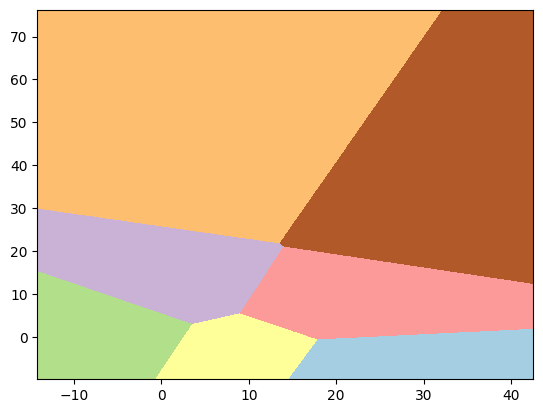

In [74]:
#Now that I know the best model, the one with 6 clusters, with label of 0.86, I can plot the graph

# Gets the minimum and maximum values and organizes the shape
x_min, x_max = pca[:, 0].min() - 5, pca[:, 0].max() - 1
y_min, y_max = pca[:, 1].min() + 1, pca[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .0285), np.arange(y_min, y_max, .0285))
Z = modelo_7c.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot of cluster's area
plt.figure(1)
plt.clf()
plt.imshow(Z, 
           interpolation = 'nearest',
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Paired,
           aspect = 'auto', 
           origin = 'lower')

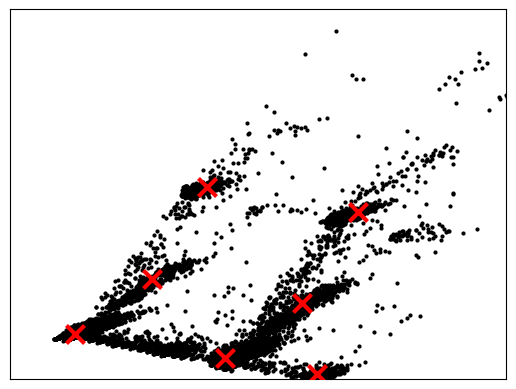

In [75]:
# Centroid's plot
plt.plot(pca[:, 0], pca[:, 1], 'k.', markersize = 4)
centroids = modelo_7c.cluster_centers_
inert = modelo_7c.inertia_
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', s = 169, linewidths = 3, color = 'r', zorder = 8)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

Creating the Cluster Map with the clusters from Model V1 that presented the best Silhouette Score.

In [76]:
# Lista com nomes das colunas
names = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity',
         'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Cria o cluster map
cluster_map = pd.DataFrame(amostra1, columns = names)
cluster_map['Global_active_power'] = pd.to_numeric(cluster_map['Global_active_power'])
cluster_map['cluster'] = modelo_7c.labels_
cluster_map

In [78]:
# Calcula a média de consumo de energia por cluster
cluster_map.groupby('cluster')['Global_active_power'].mean()

cluster
0    2.376378
1    0.513496
2    3.771807
3    3.429142
4    2.569105
5    1.776082
6    4.664808
Name: Global_active_power, dtype: float64

### End